In [141]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('3170.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter data for the date range from 2002 to 2022
filtered_df = df[(df['DATE'] >= '1922-01-01') & (df['DATE'] <= '1932-12-31')]

# Filter values greater than 0
filtered_df = filtered_df[filtered_df['VALUE'] > 0]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_values.csv', index=False)


In [142]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('3170.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter data for the date range from 2002 to 2022
filtered_df = df[(df['DATE'] >= '1922-01-01') & (df['DATE'] <= '1932-12-31')]
# Filter values greater than 0
filtered_df = filtered_df[filtered_df['VALUE'] > 0]

# Reverse the order of rows
df_reverted = filtered_df.iloc[::-1].reset_index(drop=True)

# Save the filtered and reverted DataFrame to a new CSV file
df_reverted.to_csv('filtered_valuesREV.csv', index=False)


In [144]:
import csv

# Read the CSV file and create a list of rows
with open('filtered_values.csv', 'r') as file:
    rows = list(csv.reader(file))

# Add a column with the index values
for index, row in enumerate(rows):
    row.insert(0, index)

# Save the updated data to a new CSV file
with open('filtered_values.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)


In [146]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('filtered_valuesREV.csv')

# Add a new column 'NEW_NUMBER' with the calculated values
df['NEW_NUMBER'] = df['0'] / 700

# Save the updated DataFrame back to a CSV file
df.to_csv('filtered_valuesREV.csv', index=False)


In [148]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('filtered_valuesREV.csv')

# Calculate the sum of the 'VALUE' column
sum_of_values = df['VALUE'].sum()

# Add a new column 'NEW_NUMBER' with the calculated values using the sum as the denominator
df['P'] = df['VALUE'] / sum_of_values

# Save the updated DataFrame back to a CSV file
df.to_csv('filtered_valuesREV.csv', index=False)


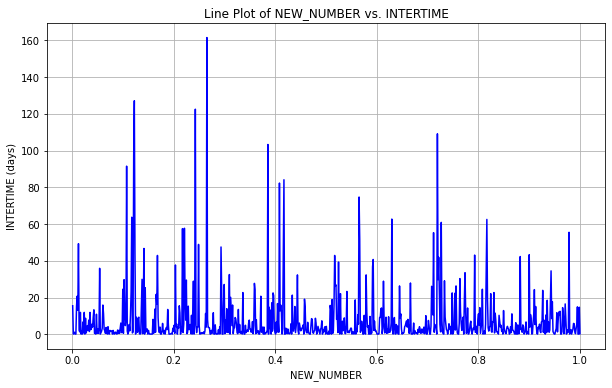

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('filtered_valuesREV.csv')

# Create a line plot with "NEW_NUMBER" on the x-axis and "INTERTIME" on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(df['NEW_NUMBER'], df['VALUE'], linestyle='-', color='b')

# Set axis labels
plt.xlabel('NEW_NUMBER')
plt.ylabel('INTERTIME (days)')

# Set plot title
plt.title('Line Plot of NEW_NUMBER vs. INTERTIME')

# Show the plot
plt.grid(True)
plt.show()


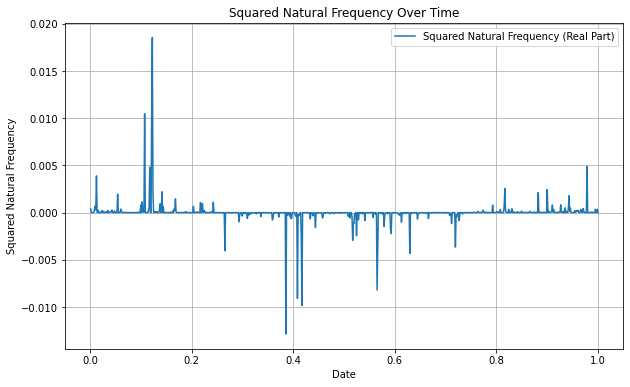

In [38]:
import pandas as pd
import cmath
import matplotlib.pyplot as plt

# Customizable constant 'n'
n = 0.5

# Load the CSV data into a DataFrame
df = pd.read_csv('filtered_valuesREV.csv')

# Calculate omega using the custom constant 'n'
omega = 2 * cmath.pi * n

# Initialize empty lists to store real and imaginary parts of squared 'NATURAL FREQUENCY'
squared_frequency_real = []
squared_frequency_imag = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Extract 'P' and 'NEW_NUMBER' from the current row
    p = row['P']
    chi = row['NEW_NUMBER']
    
    # Calculate the 'NATURAL FREQUENCY' using the formula
    nat_freq = p * cmath.exp(1j * omega * chi)
    
    # Square the 'NATURAL FREQUENCY' and append real and imaginary parts to respective lists
    squared_freq = nat_freq**2
    squared_frequency_real.append(squared_freq.real)
    squared_frequency_imag.append(squared_freq.imag)

# Add the squared 'NATURAL FREQUENCY' real and imaginary parts as new columns
df['SQUARED NATURAL FREQUENCY (Real Part)'] = squared_frequency_real
df['SQUARED NATURAL FREQUENCY (Imaginary Part)'] = squared_frequency_imag

# Save the updated DataFrame to a new CSV file
df.to_csv('filtered_values_with_squared_nat_freqREV.csv', index=False)

# Create a plot of the squared values
plt.figure(figsize=(10, 6))
plt.plot(df['NEW_NUMBER'], df['SQUARED NATURAL FREQUENCY (Real Part)'], label='Squared Natural Frequency (Real Part)')
#plt.plot(df['DATE'], df['SQUARED NATURAL FREQUENCY (Imaginary Part)'], label='Squared Natural Frequency (Imaginary Part)')
plt.xlabel('Date')
plt.ylabel('Squared Natural Frequency')
plt.title('Squared Natural Frequency Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [40]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("filtered_values_with_squared_nat_freqREV.csv")

# Function to calculate Tsallis entropy
def tsallis_entropy(q, data):
    if q == 1:
        return -np.sum(data * np.log(data))
    else:
        return (1 / (1 - q)) * (np.sum(data ** q) - 1)

# Initialize a list to store the results
q_entropy_results = []

# Calculate Tsallis entropy for subsets of increasing lengths
for i in range(1, len(df) + 1):
    subset_data = df["SQUARED NATURAL FREQUENCY (Real Part)"].iloc[:i]
    q_entropy = tsallis_entropy(0.9, subset_data)  # You can change the value of 'q' as needed
    q_entropy_results.append(q_entropy)

# Add the results as a new column
df["qENTROPY"] = q_entropy_results

# Print the DataFrame with the added "qENTROPY" column
print(df)

# Save the DataFrame to a new CSV file with the added "qENTROPY" column
df.to_csv("filtered_values_with_squared_nat_freqREV.csv", index=False)


       0        DATE  VALUE  NEW_NUMBER         P  \
0      1  2022-12-18   15.6    0.001264  0.019722   
1      2  2022-12-17    0.2    0.002528  0.000253   
2      3  2022-12-13    0.4    0.003793  0.000506   
3      4  2022-12-12    1.2    0.005057  0.001517   
4      5  2022-12-11    0.2    0.006321  0.000253   
..   ...         ...    ...         ...       ...   
786  787  2013-01-15   15.0    0.994943  0.018963   
787  788  2013-01-14    0.2    0.996207  0.000253   
788  789  2013-01-13    0.2    0.997472  0.000253   
789  790  2013-01-03   14.8    0.998736  0.018710   
790  791  2013-01-02    0.4    1.000000  0.000506   

     SQUARED NATURAL FREQUENCY (Real Part)  \
0                             3.889399e-04   
1                             6.392227e-08   
2                             2.556488e-07   
3                             2.300331e-06   
4                             6.387993e-08   
..                                     ...   
786                           3.594267e-0

In [150]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("filtered_values.csv")

# Function to calculate entropy
def entropy(row):
    new_number = row['NEW_NUMBER']
    p = row['P']
    return p * new_number * np.log(new_number) - p * new_number * np.log(p * new_number)

# Initialize a list to store the results
entropy_results = []

# Calculate entropy for each row
for _, row in df.iterrows():
    entropy_result = entropy(row)
    entropy_results.append(entropy_result)

# Add the results as a new column
df["ENTROPY"] = entropy_results

# Print the DataFrame with the added "ENTROPY" column
print(df)

# Save the DataFrame to a new CSV file with the added "ENTROPY" column
df.to_csv("filtered_values.csv", index=False)


       0        DATE  VALUE  NEW_NUMBER         P   ENTROPY
0      1  1922-01-04    1.3    0.001429  0.000225  0.000003
1      2  1922-01-05    1.3    0.002857  0.000225  0.000005
2      3  1922-01-07    1.0    0.004286  0.000173  0.000006
3      4  1922-01-15   16.6    0.005714  0.002874  0.000096
4      5  1922-01-16    4.2    0.007143  0.000727  0.000038
..   ...         ...    ...         ...       ...       ...
695  696  1932-12-17    0.2    0.994286  0.000035  0.000354
696  697  1932-12-21    5.5    0.995714  0.000952  0.006596
697  698  1932-12-26    0.4    0.997143  0.000069  0.000661
698  699  1932-12-27    6.6    0.998571  0.001143  0.007730
699  700  1932-12-28    1.0    1.000000  0.000173  0.001500

[700 rows x 6 columns]


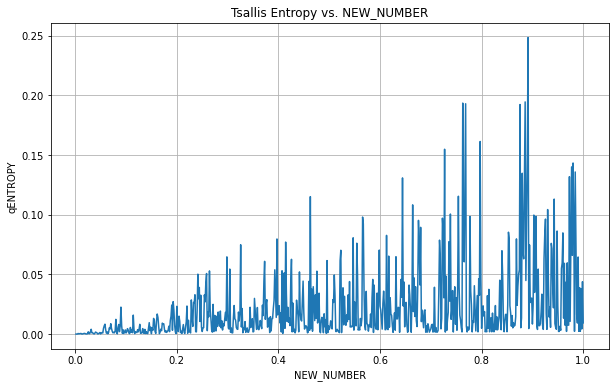

In [83]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("filtered_valuesREV.csv")

# Plot qENTROPY against NEW_NUMBER
plt.figure(figsize=(10, 6))
plt.plot(df["NEW_NUMBER"], df["ENTROPY"],linestyle='-')
plt.xlabel("NEW_NUMBER")
plt.ylabel("qENTROPY")
#plt.xlim(0.1,0.9)
#plt.ylim(9.9,10.05)
plt.title("Tsallis Entropy vs. NEW_NUMBER")
plt.grid(True)
plt.show()


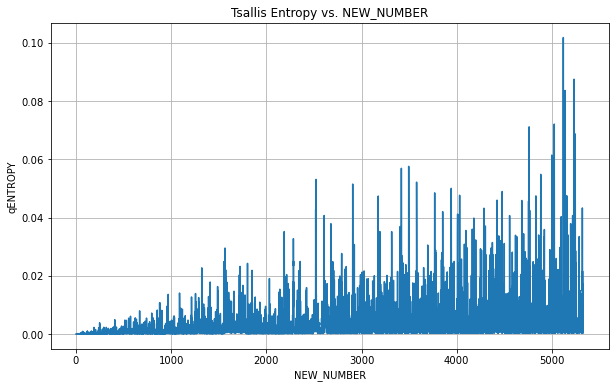

In [127]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("filtered_values.csv")



# Plot qENTROPY against NEW_NUMBER
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["ENTROPY"],linestyle='-')
plt.xlabel("NEW_NUMBER")
plt.ylabel("qENTROPY")
#plt.xlim(0.1,0.9)
#plt.ylim(9.9,10.05)
plt.title("Tsallis Entropy vs. NEW_NUMBER")
plt.grid(True)
plt.show()




In [151]:
import pandas as pd

# Load the data from INTER.csv and INTEREV.csv files
df_inter = pd.read_csv('filtered_values.csv')
df_interev = pd.read_csv('filtered_valuesREV.csv')

# Calculate the symmetrical sum and store it in a new DataFrame 'sym'
sym = pd.DataFrame()
sym['DATE'] = df_inter['DATE']
sym['SUM'] = (df_inter['ENTROPY'] - df_interev['ENTROPY']) 

# Print the 'sym' DataFrame
print(sym)

# Store the 'sym' DataFrame in a new CSV file named "SYMMETRIC.csv"
sym.to_csv('CTANTISYMMETRIC_entropy.csv', index=False)


           DATE           SUM
0    1922-01-04  5.583118e-07
1    1922-01-05 -1.671557e-05
2    1922-01-07  3.584065e-06
3    1922-01-15  5.825318e-05
4    1922-01-16  3.499286e-05
..          ...           ...
695  1932-12-17 -4.871006e-03
696  1932-12-21 -1.015062e-02
697  1932-12-26 -8.338924e-04
698  1932-12-27  5.842090e-03
699  1932-12-28 -3.908183e-04

[700 rows x 2 columns]


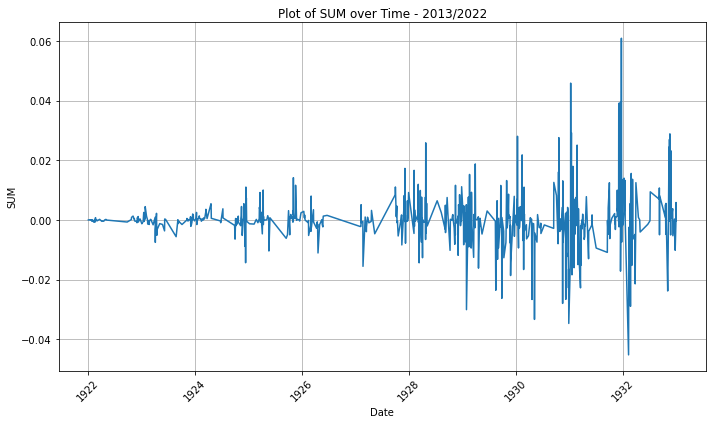

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_entropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2013/2022')
#plt.yscale('log')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

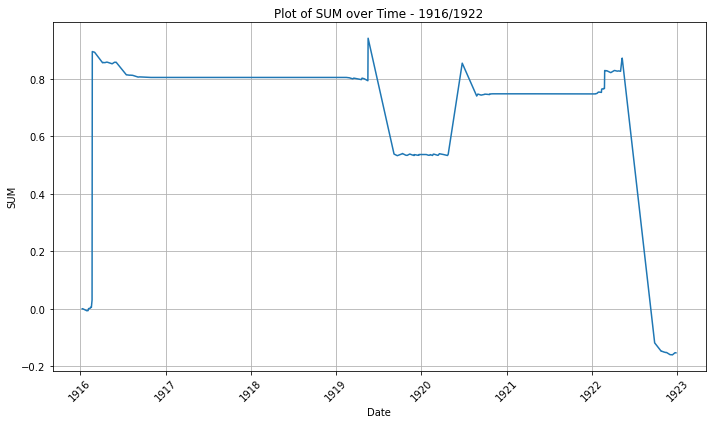

In [337]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 1916/1922')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

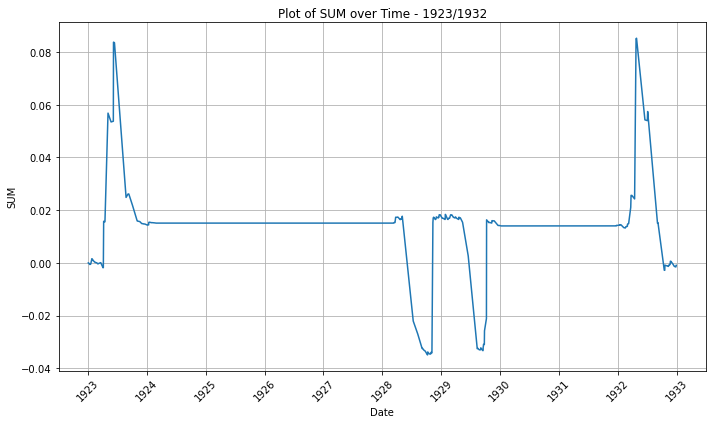

In [314]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 1923/1932')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

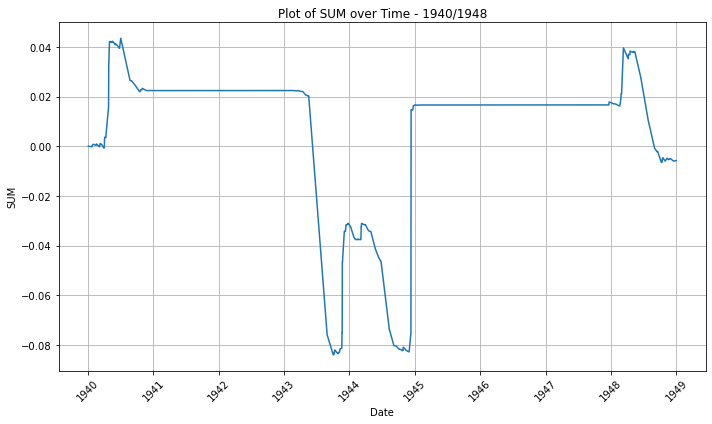

In [288]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 1940/1948')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

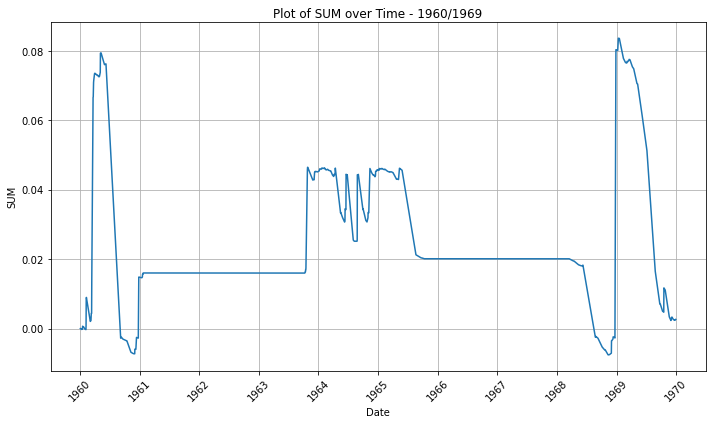

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 1960/1969')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

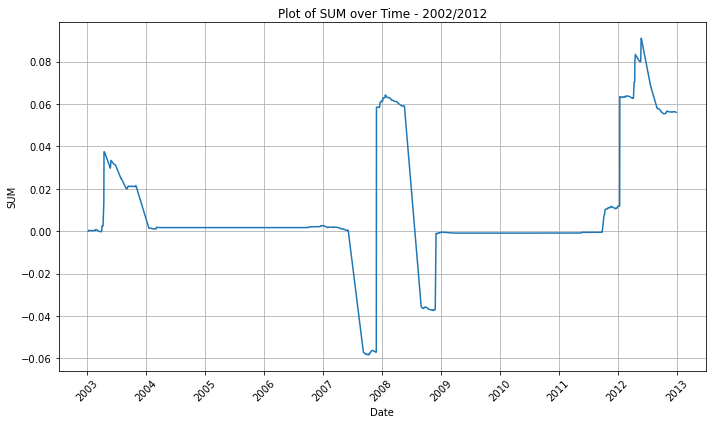

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2002/2012')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


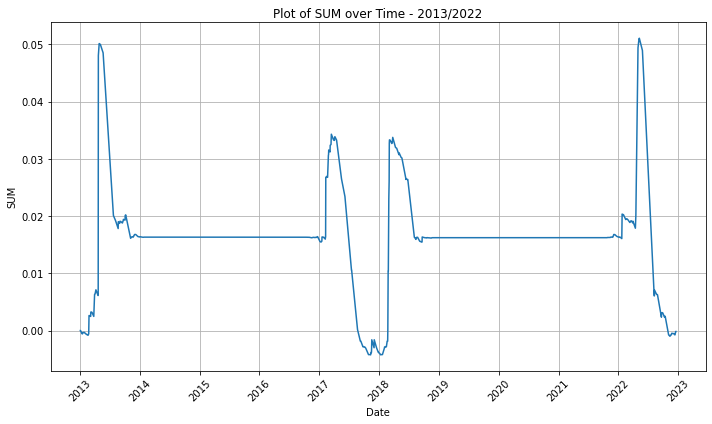

In [414]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2013/2022')
#plt.xlim(50,150)
#plt.ylim(.12,.14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

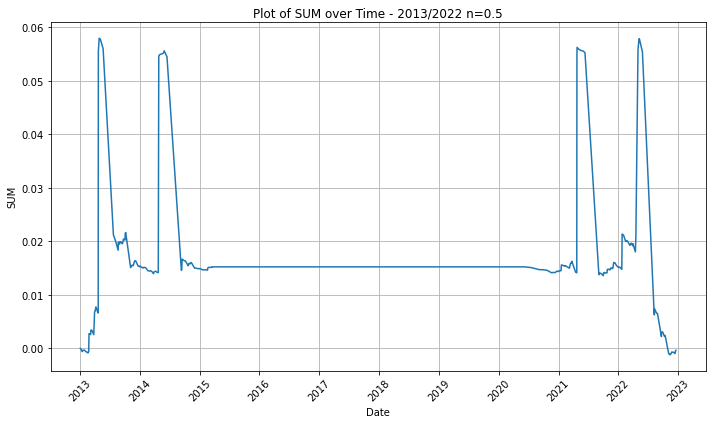

In [433]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2013/2022 n=0.5')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

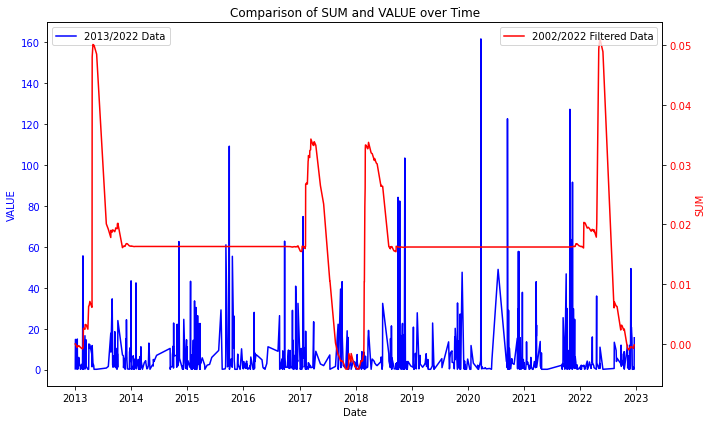

In [419]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the first CSV file into a DataFrame (2013/2022 data)
df1 = pd.read_csv('3170.csv')

# Convert the 'DATE' column to datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Filter data for the date range from 2002 to 2022
filtered_df1 = df1[(df1['DATE'] >= '2013-01-01') & (df1['DATE'] <= '2022-12-31')]

# Filter values greater than 0
filtered_df1 = filtered_df1[filtered_df1['VALUE'] > 0]

# Read the second CSV file into a DataFrame (filtered data)
df2 = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df2['DATE'] = pd.to_datetime(df2['DATE'])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first data on the primary y-axis (ax1)
ax1.plot(filtered_df1['DATE'], filtered_df1['VALUE'], linestyle='-', label='2013/2022 Data', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('VALUE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a secondary y-axis (ax2)
ax2 = ax1.twinx()

# Plot the second data on the secondary y-axis (ax2)
ax2.plot(df2['DATE'], df2['SUM'], linestyle='-', label='2002/2022 Filtered Data', color='red')
ax2.set_ylabel('SUM', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Set title
plt.title('Comparison of SUM and VALUE over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


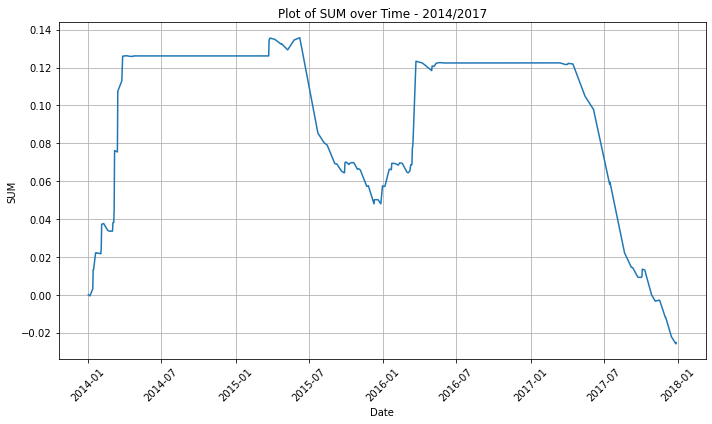

In [383]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2014/2017')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

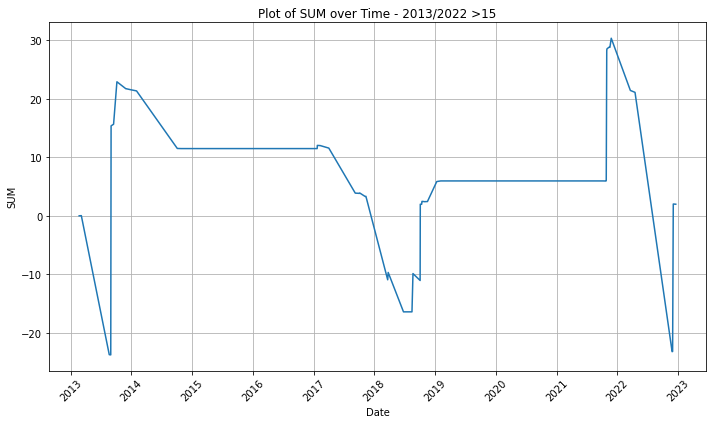

In [550]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy30.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2013/2022 >15')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

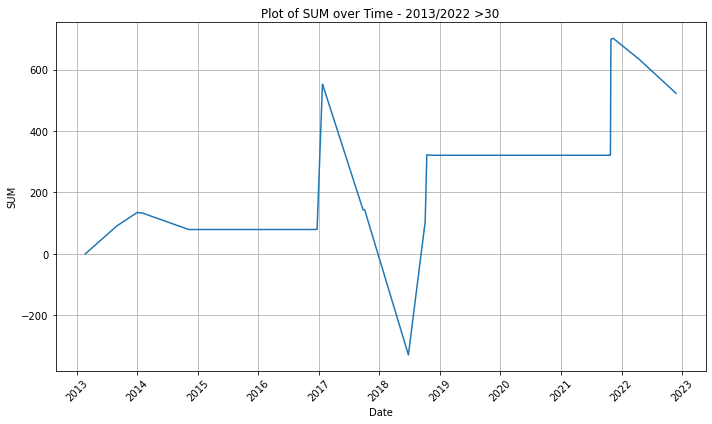

In [572]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy30.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2013/2022 >30')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

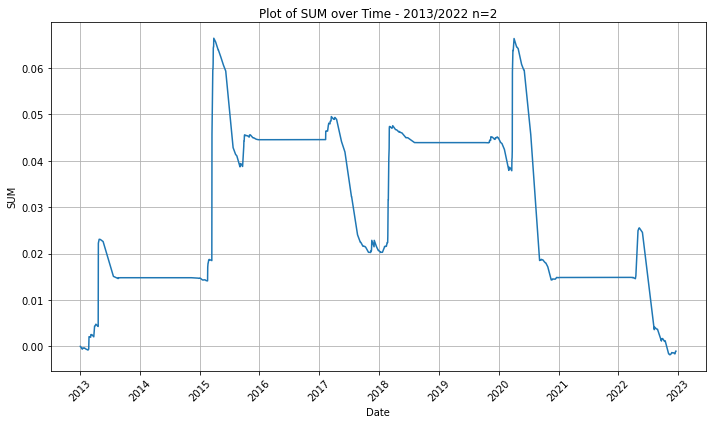

In [605]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy30.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2013/2022 n=2')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

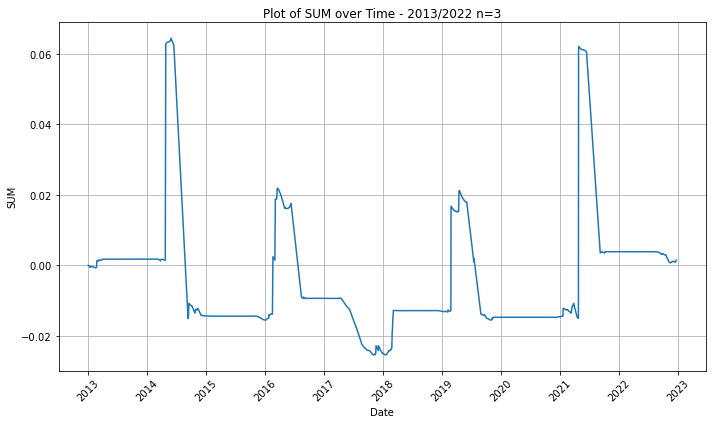

In [627]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CTANTISYMMETRIC_qentropy30.csv')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SUM'],  linestyle='-')
plt.xlabel('Date')
plt.ylabel('SUM')
plt.title('Plot of SUM over Time - 2013/2022 n=3')
#plt.xlim(150,550)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

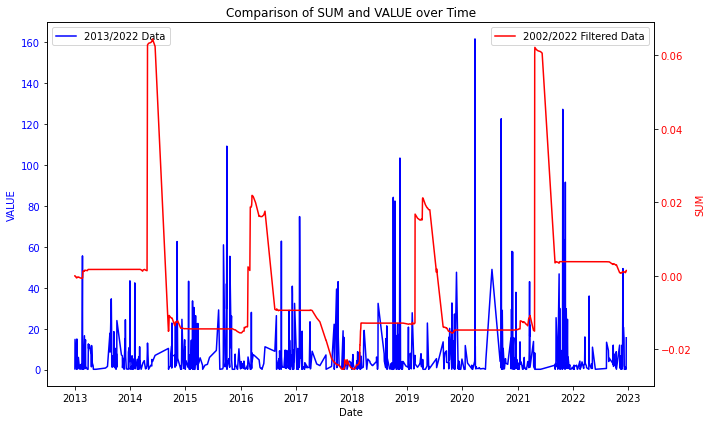

In [628]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the first CSV file into a DataFrame (2013/2022 data)
df1 = pd.read_csv('3170.csv')

# Convert the 'DATE' column to datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Filter data for the date range from 2002 to 2022
filtered_df1 = df1[(df1['DATE'] >= '2013-01-01') & (df1['DATE'] <= '2022-12-31')]

# Filter values greater than 0
filtered_df1 = filtered_df1[filtered_df1['VALUE'] > 0]

# Read the second CSV file into a DataFrame (filtered data)
df2 = pd.read_csv('CTANTISYMMETRIC_qentropy30.csv')

# Convert the 'DATE' column to datetime
df2['DATE'] = pd.to_datetime(df2['DATE'])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first data on the primary y-axis (ax1)
ax1.plot(filtered_df1['DATE'], filtered_df1['VALUE'], linestyle='-', label='2013/2022 Data', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('VALUE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a secondary y-axis (ax2)
ax2 = ax1.twinx()

# Plot the second data on the secondary y-axis (ax2)
ax2.plot(df2['DATE'], df2['SUM'], linestyle='-', label='2002/2022 Filtered Data', color='red')
ax2.set_ylabel('SUM', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Set title
plt.title('Comparison of SUM and VALUE over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
